Drawn from https://www.statsmodels.org/dev/examples/notebooks/generated/glm_formula.html.

In [1]:
# Summon libraries.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib
import scipy
import numpy as np

Call data.

In [8]:
# Call data. Uses PANDAS.
job_sat = pd.read_csv('../Data/Example1.1Data.csv')
job_sat.head(5)

,gender,age,educ,score
0,M,53,doctoral,93
1,M,48,bachelor,66
2,M,47,master,82
3,M,34,bachelor,95
4,F,35,master,78


Normality.
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

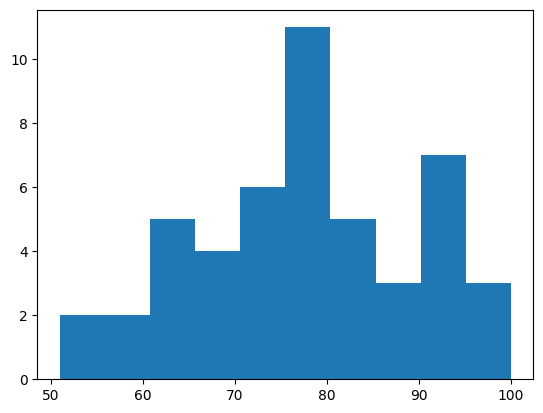

Anderson-Darling test statistic: 0.426
Shapiro-Wilks test statistic: 0.974 
Shapiro-Wilks p-value: 0.371


In [ ]:
# Sets the y-value to the y-value[name] for normality tests.
y_val = job_sat["score"]

from matplotlib import pyplot
# Summon histogram. Uses matplotlib.
pyplot.hist(y_val)
pyplot.show()

# Uses scipy.stats for an Anderson-Darling test.
from scipy.stats import anderson
# Assign result from an Anderson-Darling test using the y-value.
result = anderson(y_val)
# Dump out result's test statistic.
print(f'Anderson-Darling test statistic: {result.statistic:.3f}')

# Uses scipy.stats for a Shapiro-Wilks test.
from scipy.stats import shapiro
# Assign results from a Shapiro-Wilks test using the y-value.
statistic, p_value = shapiro(y_val)
print(f"""Shapiro-Wilks test statistic: {statistic:.3f} 
Shapiro-Wilks p-value: {p_value:.3f}""")

Develop models.

In [ ]:
# Develop model.
formula = 'score ~ age + C(gender,Treatment("F")) + C(educ,Treatment("master"))'
fitted = smf.glm(formula=formula, data=job_sat, family=sm.families.Gaussian()).fit()
print(fitted.summary())
fitloglike = (fitted.llf)
print(f'Sigma of fitted model is {np.sqrt(fitted.scale)}.')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  score   No. Observations:                   48
Model:                            GLM   Df Residuals:                       43
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          120.52
Method:                          IRLS   Log-Likelihood:                -180.47
Date:                Sun, 22 Oct 2023   Deviance:                       5182.2
Time:                        02:54:34   Pearson chi2:                 5.18e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2489
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# Null model.
formula = 'score ~ 1'
null = smf.glm(formula=formula, data=job_sat, family=sm.families.Gaussian()).fit()
nullloglike = (null.llf)

Log likelihood. Found the names through dir() https://stackoverflow.com/questions/2675028/list-attributes-of-an-object.

In [ ]:
# Uses null and fitted log likelihoods to perform the deviance test.
deviance= -2 * (nullloglike-(fitloglike))
print(f"Deviance statistic is {deviance}.")
# Chi2.cdf is from scipy.stats.
from scipy.stats import chi2
pvalue = 1 - chi2.cdf(deviance,4)
print(f"p-value is {pvalue}.")

Deviance statistic is 13.06871253851017.
p-value is 0.010944886994533443.


Prediction. https://www.statology.org/statsmodels-predict/

In [ ]:
# Prediction.
predict_val = pd.DataFrame(
    {"age" : 40, "gender" : 'F', "educ" : 'bachelor'}, index=[0])
predict_val = sm.add_constant(predict_val)
fitted.predict(predict_val)

0    74.78019
dtype: float64